<a href="https://colab.research.google.com/github/alynensilva/Atividade-Inteligencia-Artificial/blob/main/Atividade_Ativa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade Ativa - Introdução à Inteligência Artificial

Para a realização deste trabalho, foi utilizado o dataset Iris, que reúne dados acerca de plantas do gênero Iris. Com os dados contidos no dataset, é possível classificar três espécies: versicolor, setosa e virginica.

Neste trabalho, será utilizado o modelo KNN para classificação e previsão. Primeirante, importam-se as primeiras bibliotecas necessárias para a preparação dos dados:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

É necessário, também, ler o arquivo csv contendo o dataset.

In [ ]:
#Leitura do arquivo csv
iris = pd.read_csv("Iris.csv")

Ao chamar o objeto iris criado contendo o dataset, pode-se ver que ele tem 150 linhas e 6 colunas. Para este trabalho, apenas 5 serão relevantes.

In [ ]:
#Exibindo o conteúdo do dataset por meio do objeto "iris" criado
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
#Verificação do número de linhas para cada espécie
iris.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Para visualizar e classificar os dados corretemente, é necessário separar as características dos rótulos, criando-se dois <i>arrays</i>.

In [ ]:
#Divisão do dataset entre características e rótulos
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = iris[features].values
Y = iris['Species'].values

Como foi possível ver no conteúdo do dataset, os dados da coluna correspondente aos rótulos são <i>strings</i>. O classificador <i>KNeighborsClassifier</i>, que será aplicado mais adiante, não trabalha com strings e, portanto, é preciso transformar os rótulos em números. Para isso, foi utilizado o <i>LabelEncoder</i> da biblioteca scikit-learn.

Dessa forma, o classificador entenderá que <i>Iris setosa</i> = 0, <i>Iris versicolor</i> = 1 e <i>Iris virginica</i> = 2.

In [ ]:
#Transformação dos rótulos em valores númericos para implementar o classificador KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_encoded = encoder.fit_transform(Y)

Em seguida, o dataset é dividido em um conjunto de treinamento e outro de teste utilizando o <i>train_test_split</i>.

In [ ]:
#Divisão do dataset entre conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Para a visualização dos dados, foi utilizada a biblioteca matplotlib.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Os gráficos abaixo exibem as relações entre as diferentes características que determinam a espécie da planta:

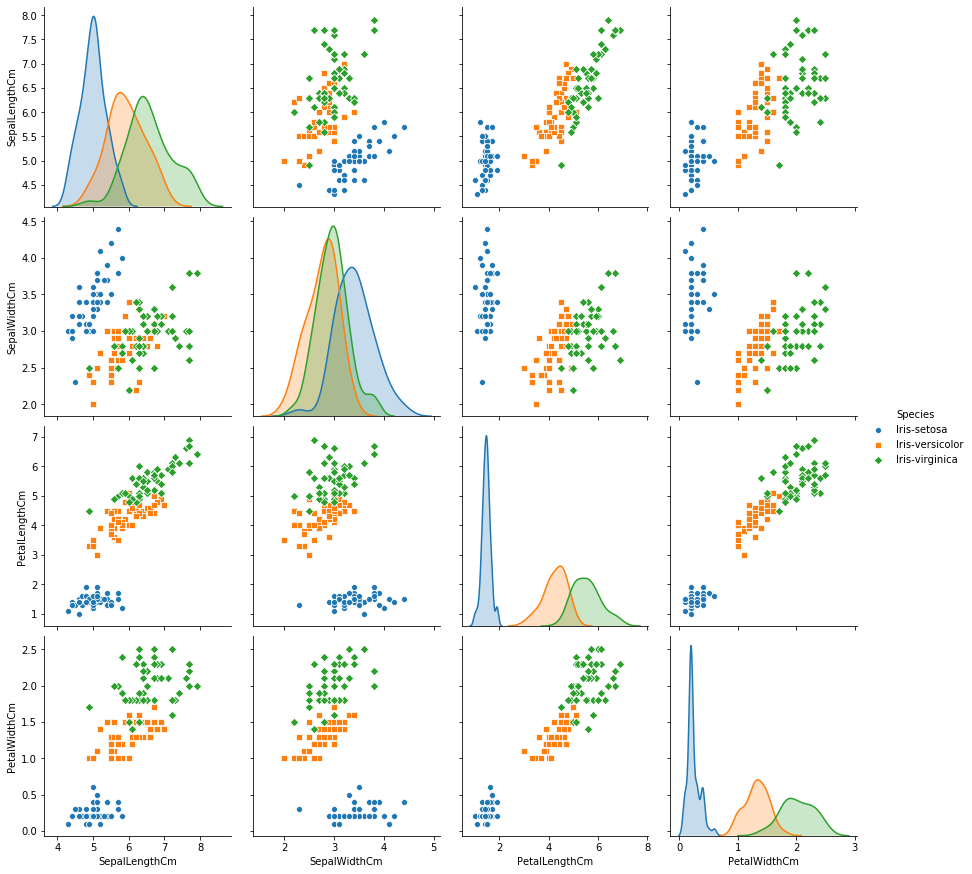

In [ ]:
#Plotando os gráficos
sns.pairplot(iris.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

![0_Uw37vrrKzeEWahdB.jfif](attachment:0_Uw37vrrKzeEWahdB.jfif)

Após a preparação dos dados, pode-se aplicar o modelo KNN. Primeiramente, é necessário importar as seguintes bibliotecas:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Para maior precisão, foi utilizado o <i>KNeighborsClassifier</i> com o número de vizinhos determinado em 3.

In [ ]:
#Atribuição do KNeighborsClassifier ao objeto knn com 3 vizinhos
knn = KNeighborsClassifier(n_neighbors=3)

Para o modelo funcionar corretamente, é necessário treiná-lo com o método <i>fit</i>. Os parâmetros são os conjuntos de treinamento definidos anteriormente.

In [ ]:
#Treinamento do algoritmo
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


Após o treinamento do modelo, aplica-se o método <i>predict</i> ao conjunto de teste, exibindo o resultado da previsão.

In [ ]:
#Previsão
Y_pred = knn.predict(X_test)

In [ ]:
print('Previsão {}'.format(Y_pred))

Previsão ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']


In [ ]:
#Cálculo da precisão do modelo
accuracy = accuracy_score(Y_test, Y_pred)*100
print('A precisão da previsão do modelo é de ' + str(round(accuracy, 2)) + ' %.')

A precisão da previsão do modelo é de 96.67 %.
